**HEART DISEASE CAPSTONE PROJECT TO PREDICT NO DISEASE OR DISEASE**

**Careerera Pg Data Science June 2022 Batch**

**Name: Olatunji James Akibon**


**Project Title - Heart Disease Prediction**

The heart prediction project is a machine learning Capstone project that seeks to determine a person's likelihood of having heart disease based on a number of medical indicators. The project employs machine learning techniques like logistic regression and random forest to train models for heart disease prediction using a dataset containing details on patients' age, sex, blood pressure, cholesterol levels, and other pertinent factors. The project's objective is to create a precise and trustworthy predictive model that will help medical practitioners identify and treat cardiac disease.

**Objective of the project**


*   The objective of the heart disease dataset project is to build a predictive model that can accurately classify whether a patient has heart disease or not based on a set of input features

**Steps in Building the Model**

1.   Take the Data and create a dataframe
2.   Divide into Input and Output (x – i/p , y-o/p)
3.   Import an algorithm
4.   call a Classifier/Regressor/Clusterer
5.   Fit the model (Map inputs with output)
6.   Predict the output
7.   Evaluation : r2 score (accuracy)

**1. Take the Data and create a dataframe**

Importing the Libaries
Data Collection and Processing - Exploratory Data Analysis (EDA)

In [1]:
#Importing the Libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

**#Data Collection and Processing - Exploratory Data Analysis (EDA)**

**Datasets Attributes**
age : age of persons
sex : gender of persons
cp : chest pain type (4 values)
trtbps : resting blood pressure
chol : serum cholestrol in mg/dl
fbs : fasting blood sugar > 120 mg/dl
restecg : resting electrocardio results(values 0,1,2)
thalach : maximum heart rate achieved
exng : exercise induced angina
oldpeak : ST depression induced by exercise relative to rest
slp : the slope of the peak exercise ST segment
caa : number of major vessels(0-3) colored by flourosopy
thall : 0=normal, 1=fixed defect, 2 = reversable defect
output : Target column, 1 = Diseased, 0 = Not Diseased

In [2]:
#Data Collection and Processing - Exploratory Data Analysis (EDA)
#Data Collection and Processing
heart_df = pd.read_csv('/content/heart.csv')
heart_df # print first and the last 5 rows of the dataset shows there are 303 rows and 14 columns

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


In [3]:
#check the shape of the dataset and the data types of each column:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
heart_df.shape

(303, 14)

Based on our inference from the above output, we have a relatively small dataset consisting of 303 rows. Now, let's examine the characteristics of each feature within this dataset.

In [5]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Within our dataset of 14 features, 13 are of integer type while only one is of float type

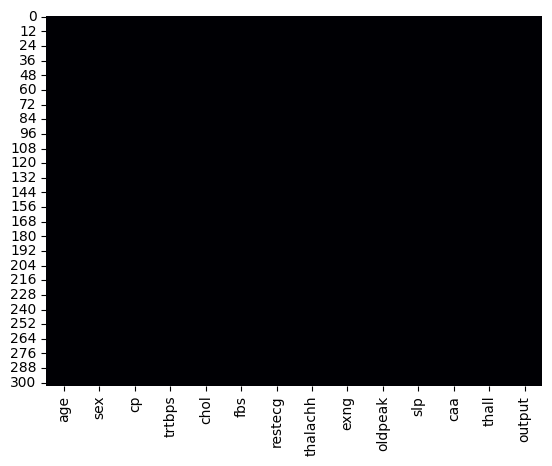

In [7]:
#missing values in heatmap
import seaborn as sns
sns.heatmap(heart_df.isnull(),cmap = 'magma',cbar = False);

A map or graph with zero missing values indicates that there are no null values in the data, which in turn means that there is comprehensive and accurate information available for all the areas or points plotted on the map or graph.There are no null values in the data

Since we are gathering information from each feature, it is important to assess the statistical spread of the dataset. Let's take a closer look at this.

In [8]:
heart_df.describe()# statistical spread of the dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Examining the correlation between features is a crucial step in analysis, as it allows us to identify positive and negative correlations. Thus, let's assess the correlation between the different features in our dataset.

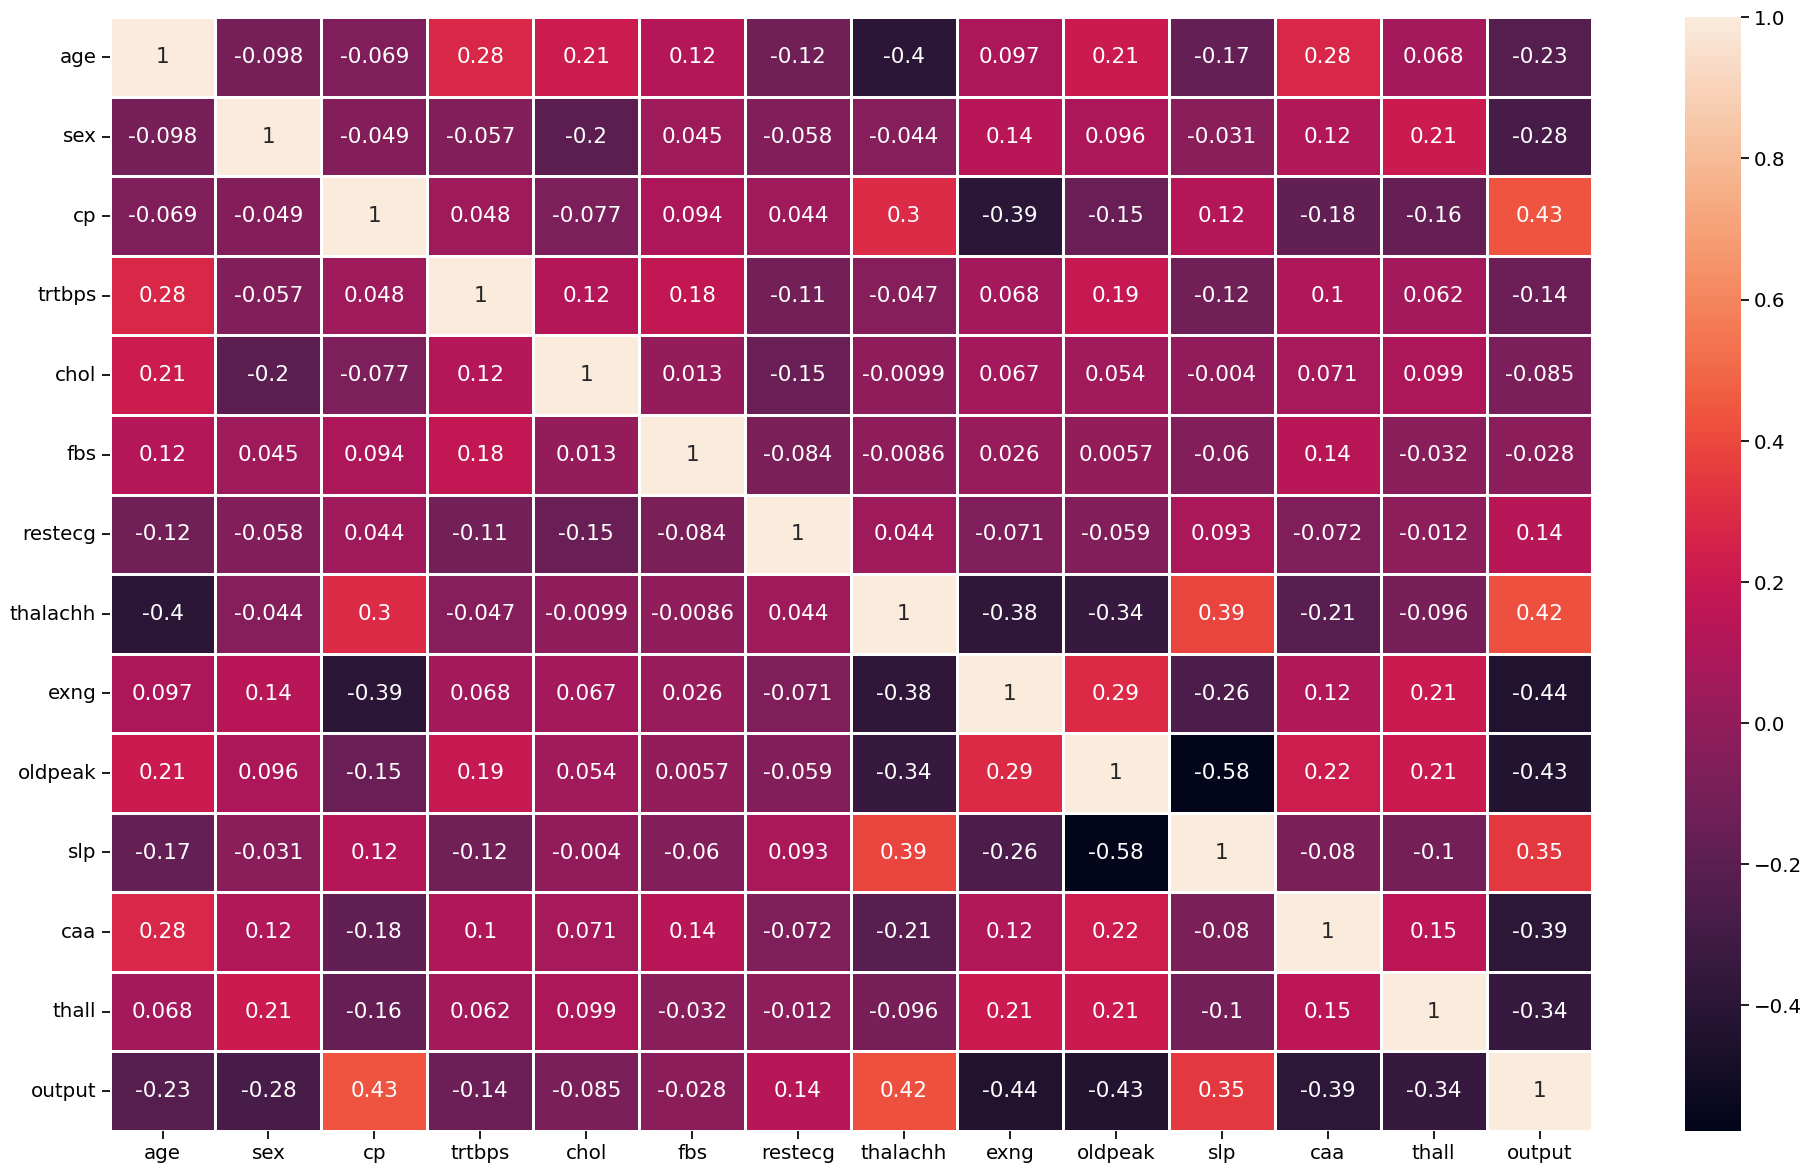

In [48]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(heart_df.corr(),annot=True,linewidth =2)
plt.tight_layout()

Examining the correlation between features, the negative shows no relationship and the positive sign shows relationships.

In [9]:
# get the summary statistics
stats = heart_df.describe()

# transpose the summary statistics
stats_transposed = stats.transpose()

# print the transposed summary statistics
print(stats_transposed)

          count   mean   std    min    25%    50%    75%    max
age      303.00  54.37  9.08  29.00  47.50  55.00  61.00  77.00
sex      303.00   0.68  0.47   0.00   0.00   1.00   1.00   1.00
cp       303.00   0.97  1.03   0.00   0.00   1.00   2.00   3.00
trtbps   303.00 131.62 17.54  94.00 120.00 130.00 140.00 200.00
chol     303.00 246.26 51.83 126.00 211.00 240.00 274.50 564.00
fbs      303.00   0.15  0.36   0.00   0.00   0.00   0.00   1.00
restecg  303.00   0.53  0.53   0.00   0.00   1.00   1.00   2.00
thalachh 303.00 149.65 22.91  71.00 133.50 153.00 166.00 202.00
exng     303.00   0.33  0.47   0.00   0.00   0.00   1.00   1.00
oldpeak  303.00   1.04  1.16   0.00   0.00   0.80   1.60   6.20
slp      303.00   1.40  0.62   0.00   1.00   1.00   2.00   2.00
caa      303.00   0.73  1.02   0.00   0.00   0.00   1.00   4.00
thall    303.00   2.31  0.61   0.00   2.00   2.00   3.00   3.00
output   303.00   0.54  0.50   0.00   0.00   1.00   1.00   1.00


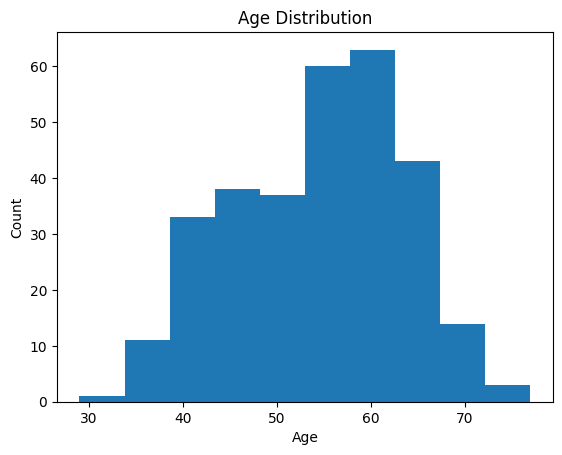

In [10]:
# Plot a histogram of the age column
plt.hist(heart_df['age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

This histogram shows the distribution of ages in the dataset. We can see that the majority of the individuals are between 40-70 years old.

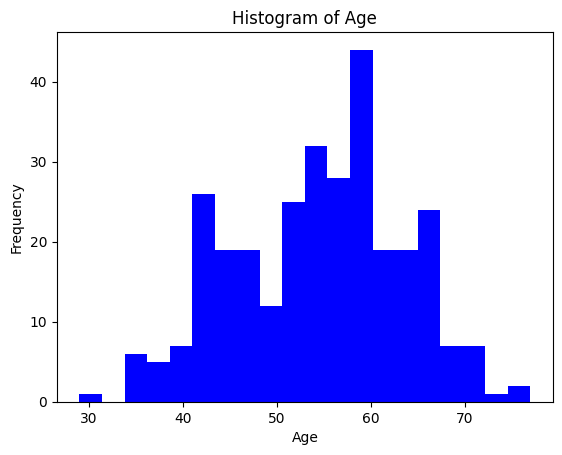

In [11]:
plt.hist(heart_df['age'], bins=20, color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

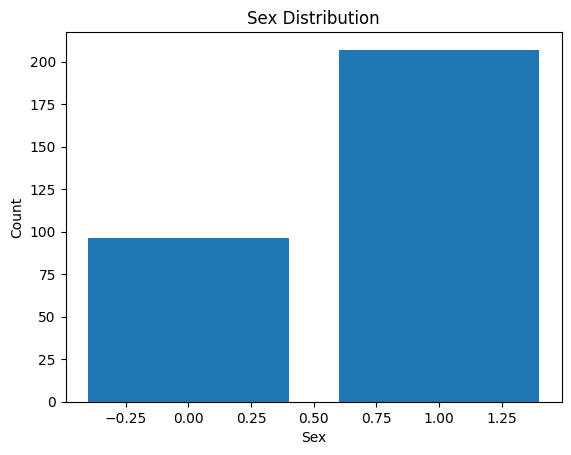

In [12]:
# Plot a bar chart of the sex column
sex_counts = heart_df['sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

The conclusion from the bar chart is that the dataset is slightly biassed towards male because there are more men than women in it. When analysing the data and developing models, this information may be crucial because it may have an impact on the results' accuracy.

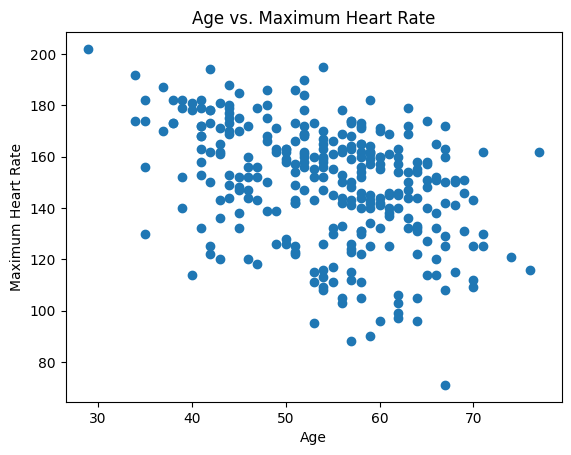

In [13]:
# Plot a scatter plot of the age and thalachh columns
plt.scatter(heart_df['age'], heart_df['thalachh'])
plt.title('Age vs. Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

The scatter plot shows the relationship between age and maximum heart rate for each individual in the dataset. We can see that there is a negative association between age and maximum heart rate, which suggests that as age grows, the maximum heart rate tends to drop. However, there is a lot of variation in the data, and some outliers, despite being older, have high maximum heart rates. This scatter plot's overall conclusion is that while age may be a useful predictor of maximum heart rate, other factors may also play a role in a person's maximum heart rate.

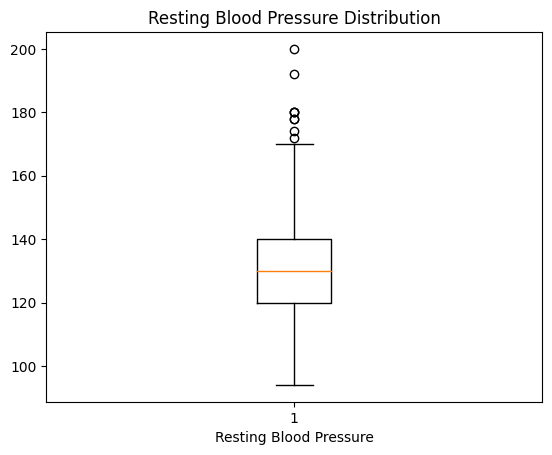

In [14]:
# Plot a box plot of the trtbps column
plt.boxplot(heart_df['trtbps'])
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure')
plt.show()

Interpreting the box plot, we can see that the trtbps values are relatively normally distributed, with a slight skew towards higher values. The median (middle value) of the trtbps column is around 130, with the IQR spanning from approximately 120 to 140. There are several outliers with values above 170, indicating some extreme values in the dataset. Overall, the box plot suggests that the trtbps column may be a useful feature in predicting the presence of heart disease.

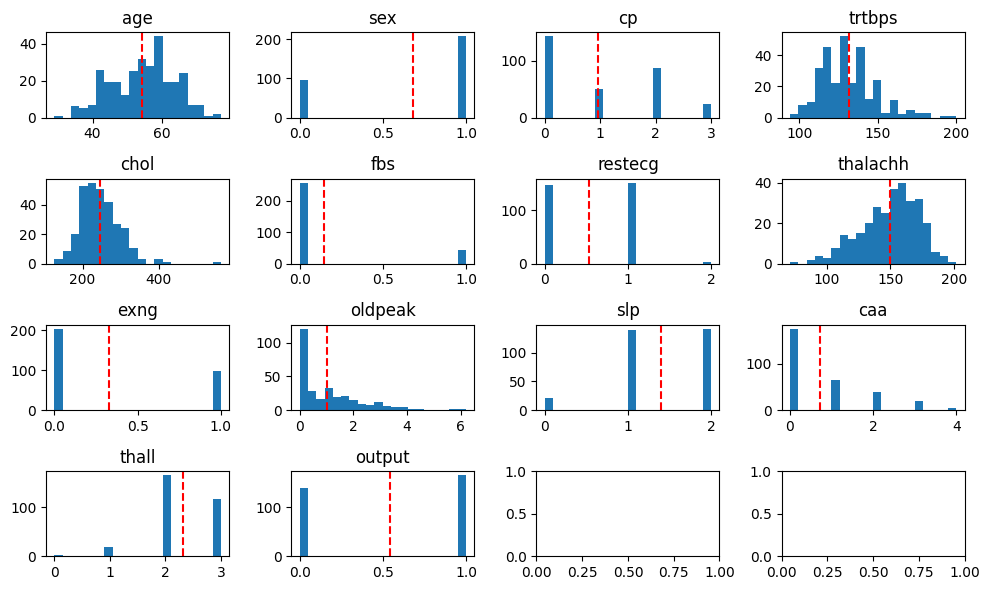

In [15]:
# the distribution of all features"
mean_heart_df = heart_df.mean()
fig, ax = plt.subplots(figsize=(10, 6), nrows=4, ncols=4)
ax = ax.flatten()
for i in range(len(mean_heart_df)):
    ax[i].hist(heart_df.iloc[:,i], bins=20)
    ax[i].axvline(mean_heart_df[i], color='r', linestyle='--')
    ax[i].set_title(heart_df.columns[i])
plt.tight_layout()
plt.show()

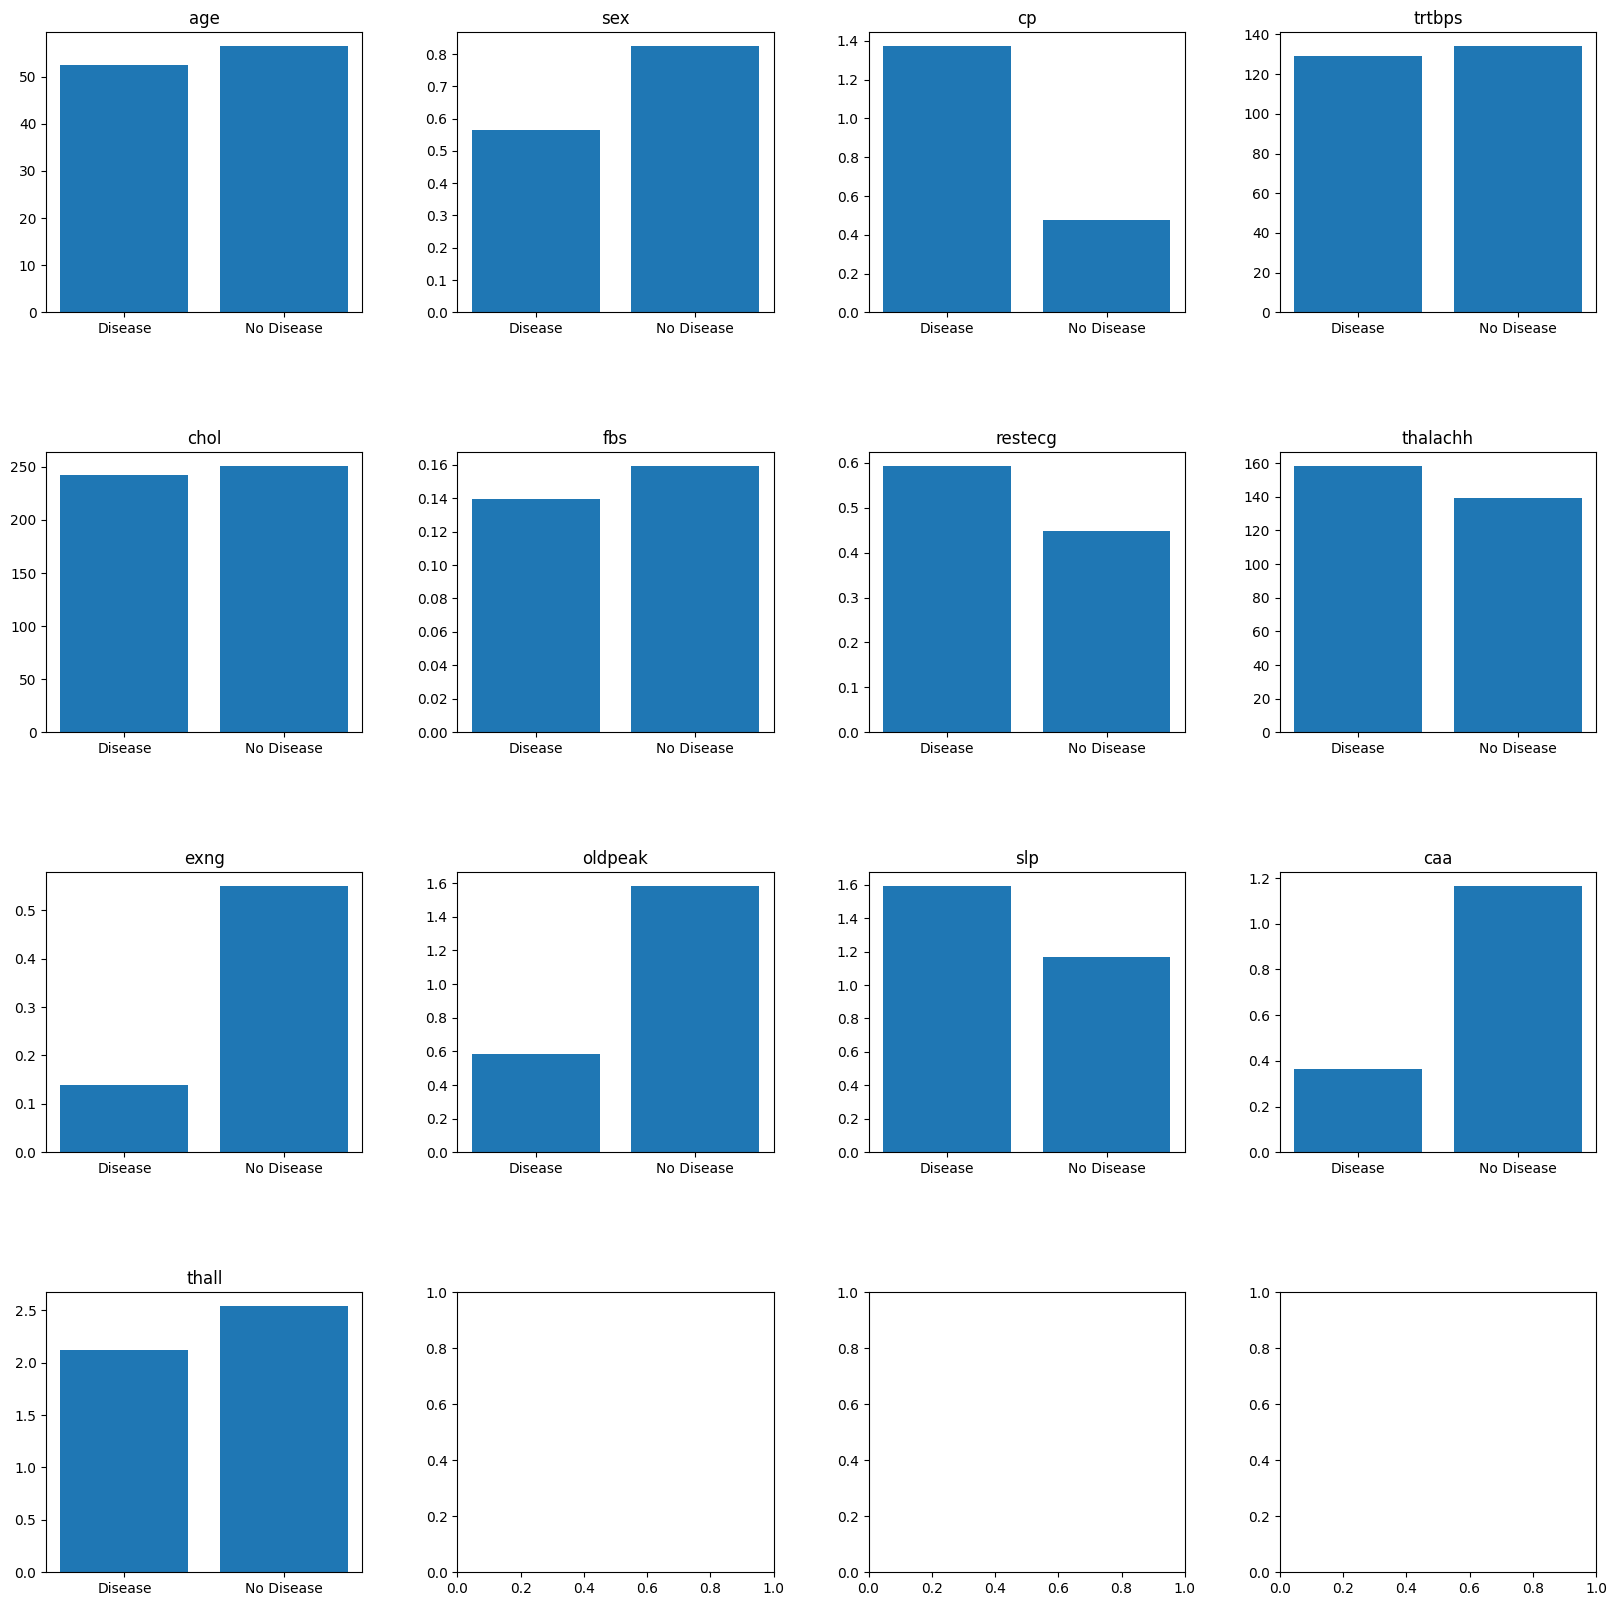

In [16]:
# Separate the data by output (1 for heart disease, 0 for no heart disease)
disease = heart_df[heart_df.output == 1]
no_disease = heart_df[heart_df.output == 0]
colors = ['#F93822','#FDD20E']

# Get the mean values of all features for both groups
disease_means = disease.mean()
no_disease_means = no_disease.mean()

# Create subplots for each feature
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20,20))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Plot the means for each feature in each subplot
for i, feature in enumerate(heart_df.columns[:-1]):
    row = i // 4
    col = i % 4
    axs[row, col].bar(["Disease", "No Disease"], [disease_means[feature], no_disease_means[feature]])
    axs[row, col].set_title(feature)

# Show the plot
plt.show()


The mean values of several features for cases of heart disease and non-heart disease are displayed in each subplot. Each subplot's x-axis displays the two groups (those with and without disease), while the y-axis displays the feature's mean value.

**Dividing features into Numerical and Categorical**

In [17]:
#Dividing features into Numerical and Categorical
col = list(heart_df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(heart_df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : sex cp fbs restecg exng slp caa thall output
Numerical Features : age trtbps chol thalachh oldpeak


If an attribute contains fewer than six distinct elements, it is defined as a categorical feature; otherwise, it is a numerical feature.
Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.
Examples include datatype = integer, attribute = numerical feature, and datatype = string, attribute = categorical feature.
For this dataset, as the number of features are less, we can manually check the dataset as well.

In [18]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = heart_df.copy(deep = True)

df1['sex'] = le.fit_transform(df1['sex'])
df1['cp'] = le.fit_transform(df1['cp'])
df1['fbs'] = le.fit_transform(df1['fbs'])
df1['restecg'] = le.fit_transform(df1['restecg'])
df1['exng'] = le.fit_transform(df1['exng'])
df1['slp '] = le.fit_transform(df1['slp'])
df1['caa'] = le.fit_transform(df1['caa'])
df1['thall'] = le.fit_transform(df1['thall'])


It is frequently necessary to make a deep copy of the dataset in order to guarantee that the original dataset is kept intact. This can be especially helpful when changing the data for modelling and visualisation purposes. In this case, create a deep copy of the original dataset and then use label encoding to convert the categorical features into numerical values. This will allow the dataset for viewing and modelling without changing the original dataset.
It is vital to note that any adjustments made to the deep copy of the dataset will not be reflected in the original dataset. Consequently, it is vital to use the deep copy for any later investigation.

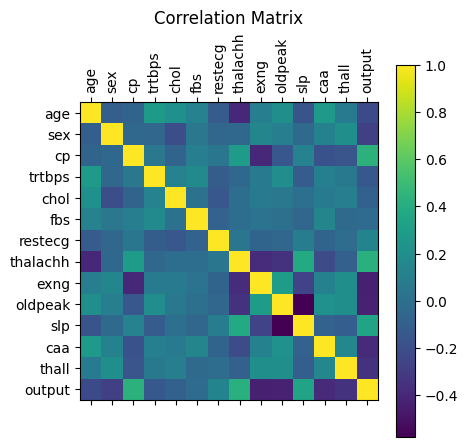

In [19]:
# Plot a correlation matrix of the numerical columns
corr_matrix = heart_df.corr()
plt.matshow(corr_matrix)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

Based on the correlation matrix, we can derive the following conclusions:
There is a positive correlation between age and trtbps (blood pressure).
There is a negative correlation between age and thalachh (maximum heart rate achieved) (maximum heart rate achieved).
There is a positive correlation between thalachh and the oldpeak (ST depression induced by exercise relative to rest) (ST depression induced by exercise relative to rest).
The relationship between trtbps and chol (measured as cholesterol in mg/dl) is marginally positive.
There is a weak negative correlation between thalachh and chol.
There is no significant correlation between caa (number of major vessels) and any of the other numerical features.
It's important to note that correlation does not imply causation and further analysis is needed to draw any definitive conclusions.

<Axes: >

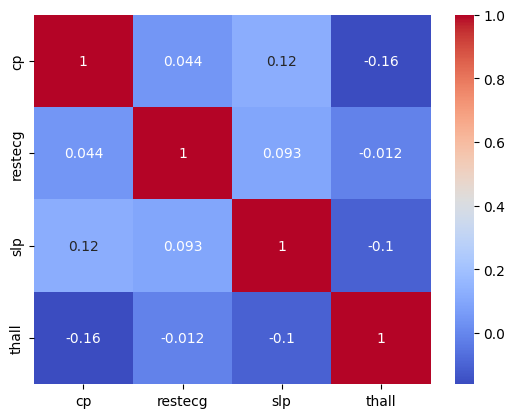

In [20]:
# Plot a correlation matrix of the categorical columns
encoded_categorical_cols = ['cp', 'restecg', 'slp', 'thall']
encoded_categorical_heart_df = heart_df[encoded_categorical_cols]
encoded_categorical_corr = encoded_categorical_heart_df.corr()
sns.heatmap(encoded_categorical_corr, annot=True, cmap='coolwarm')

In [21]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['oldpeak'] = mms.fit_transform(df1[['oldpeak']])
df1['age'] = ss.fit_transform(df1[['age']])
df1['trtbps'] = ss.fit_transform(df1[['trtbps']])
df1['chol'] = ss.fit_transform(df1[['chol']])
df1['thalachh'] = ss.fit_transform(df1[['thalachh']])
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,slp
0,0.95,1,3,0.76,-0.26,1,0,0.02,0,0.37,0,0,1,1,0
1,-1.92,1,2,-0.09,0.07,0,1,1.63,0,0.56,0,0,2,1,0
2,-1.47,0,1,-0.09,-0.82,0,0,0.98,0,0.23,2,0,2,1,2
3,0.18,1,1,-0.66,-0.20,0,1,1.24,0,0.13,2,0,2,1,2
4,0.29,0,0,-0.66,2.08,0,1,0.58,1,0.10,2,0,2,1,2


**plot Categorical Features against output**

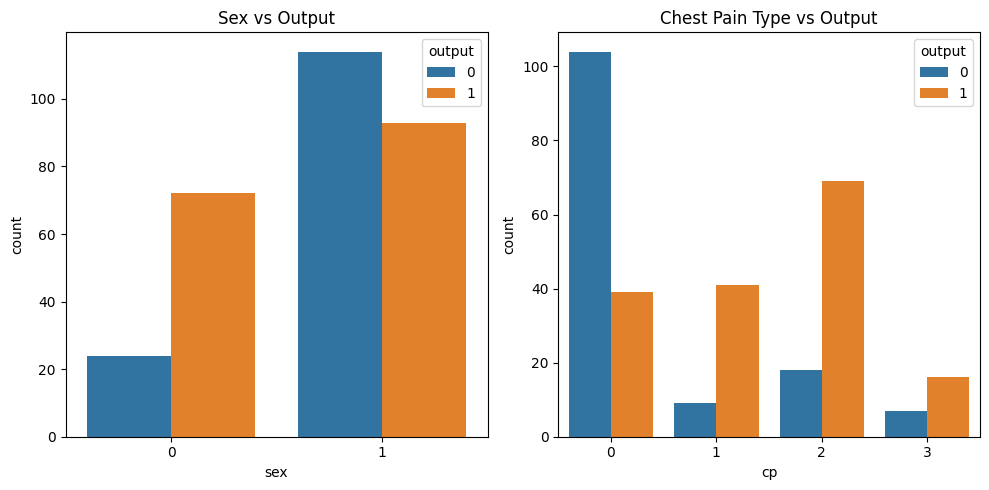

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='sex', hue='output', data=df1)
plt.title('Sex vs Output')

plt.subplot(1,2,2)
sns.countplot(x='cp', hue='output', data=df1)
plt.title('Chest Pain Type vs Output')

plt.tight_layout()
plt.show()

From the plots, we can see that:

The numbers of males with heart disease is higher than the proportion of females with heart disease.
Chest pain type 2  and type 1 have a higher proportion of patients with heart disease compared to type 3 and type 0.

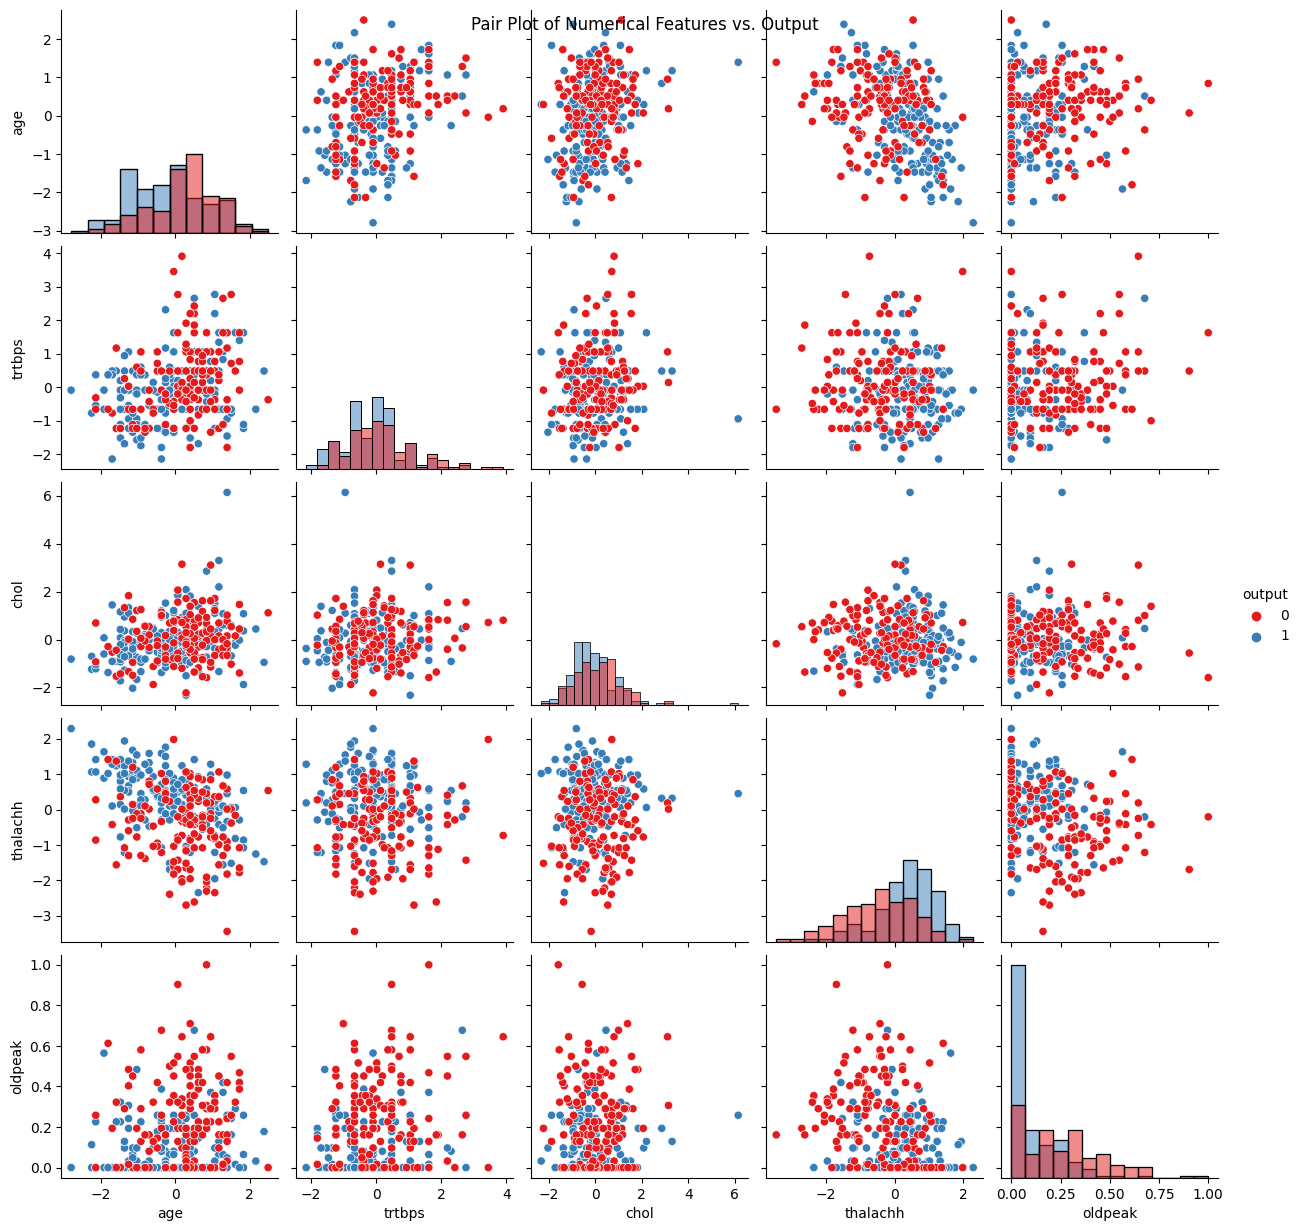

In [23]:

# select numerical features and output column
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
output_col = 'output'

# create pair plot
sns.pairplot(df1, vars=num_cols, hue=output_col, diag_kind='hist', palette='Set1')

# add plot title
plt.suptitle('Pair Plot of Numerical Features vs. Output')

# display plot
plt.show()

The graph displays histograms of each feature on the diagonal as well as scatter plots pitting all numerical features against one another. According to the result, the points are coloured (blue for no heart disease and orange for heart disease).

The plot reveals the following:

The most significant determinants of heart disease appear to be age and the maximal heart rate achieved (thalachh). Heart disease sufferers are typically older and have lower maximal heart rates.
Both cholesterol levels and resting blood pressure (trtbps) do not seem to be reliable indicators of heart disease. Significant overlap between the two groups is visible in the scatter plots (heart disease vs. no heart disease).
Another factor that appears to be a good predictor of heart disease is the oldpeak characteristic, which evaluates the ST depression brought on by activity in comparison to rest. Oldpeak values likely to be greater in people with heart disease.

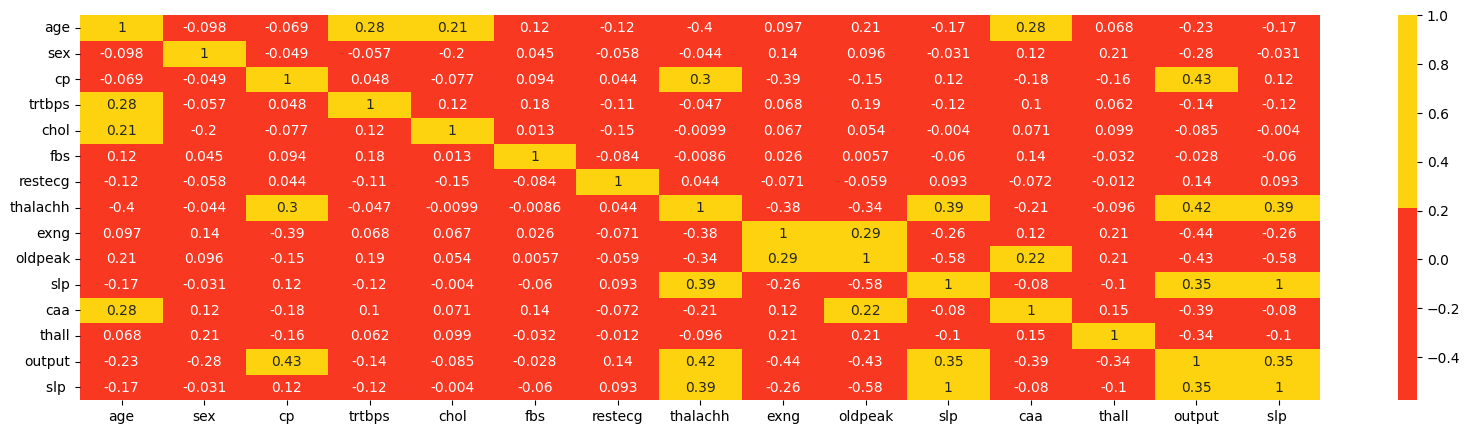

In [24]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

As per the heatmap, the features that seem to have a relatively strong correlation with the target variable 'output' are:

age
sex
cp
thalachh
exng
oldpeak

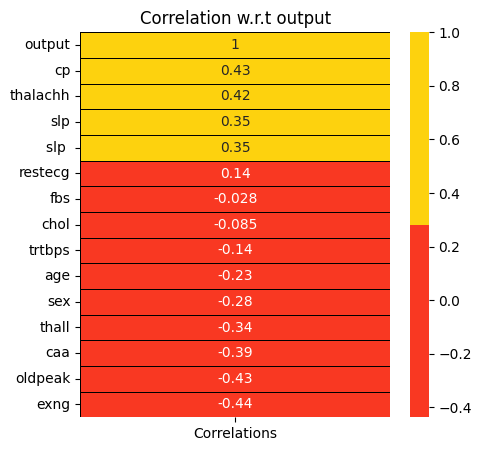

In [25]:
corr = df1.corrwith(df1['output']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
colors = ['#F93822','#FDD20E']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t output');

In [26]:
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,slp
0,0.95,1,3,0.76,-0.26,1,0,0.02,0,0.37,0,0,1,1,0
1,-1.92,1,2,-0.09,0.07,0,1,1.63,0,0.56,0,0,2,1,0
2,-1.47,0,1,-0.09,-0.82,0,0,0.98,0,0.23,2,0,2,1,2
3,0.18,1,1,-0.66,-0.20,0,1,1.24,0,0.13,2,0,2,1,2
4,0.29,0,0,-0.66,2.08,0,1,0.58,1,0.10,2,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.29,0,0,0.48,-0.10,0,1,-1.17,1,0.03,1,0,3,0,1
299,-1.03,1,3,-1.23,0.34,0,1,-0.77,0,0.19,1,0,3,0,1
300,1.50,1,0,0.71,-1.03,1,1,-0.38,0,0.55,1,2,3,0,1
301,0.29,1,0,-0.09,-2.23,0,1,-1.52,1,0.19,1,1,3,0,1


All features except for RestECG demonstrate either a positive or negative association with the output.

All the features, except for RestECG, exhibit either a positive or negative correlation with the output.

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

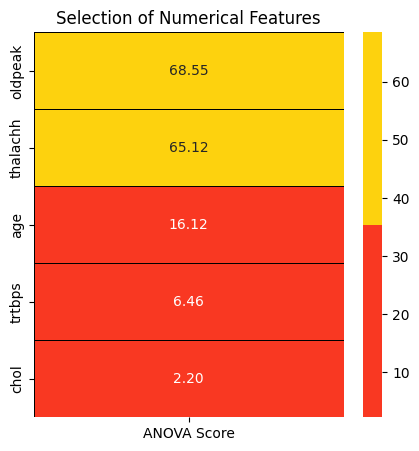

In [28]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [29]:
# Import required library
from scipy.stats import f_oneway

# Create a list of numerical features
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Loop through each numerical feature and calculate ANOVA F-score and p-value
for col in num_cols:
    heart_disease = df1[df1['output']==1][col]
    no_heart_disease = df1[df1['output']==0][col]
    F_score, p_value = f_oneway(heart_disease, no_heart_disease)
    print(f"Feature: {col}, F-score: {F_score:.2f}, p-value: {p_value:.4f}")

Feature: age, F-score: 16.12, p-value: 0.0001
Feature: trtbps, F-score: 6.46, p-value: 0.0115
Feature: chol, F-score: 2.20, p-value: 0.1388
Feature: thalachh, F-score: 65.12, p-value: 0.0000
Feature: oldpeak, F-score: 68.55, p-value: 0.0000


Based on the ANOVA scores, the features with a p-value less than 0.05 (i.e., age, trtbps, thalachh, and oldpeak) are significant in relation to the output variable, while chol is not significant. Therefore, we may consider dropping the chol feature from the dataset. However, it is important to consider the context and purpose of the analysis before making any decisions regarding feature selection.

In [30]:
from scipy.stats import chi2_contingency

# Define categorical features
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

# Loop through categorical features and perform chi-square test
for feature in cat_features:
    contingency_table = pd.crosstab(df1[feature], df1['output'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{feature} vs output:\n  chi2 score = {chi2:.2f}, p-value = {p:.4f}")

sex vs output:
  chi2 score = 22.72, p-value = 0.0000
cp vs output:
  chi2 score = 81.69, p-value = 0.0000
fbs vs output:
  chi2 score = 0.11, p-value = 0.7444
restecg vs output:
  chi2 score = 10.02, p-value = 0.0067
exng vs output:
  chi2 score = 55.94, p-value = 0.0000
slp vs output:
  chi2 score = 47.51, p-value = 0.0000
caa vs output:
  chi2 score = 74.37, p-value = 0.0000
thall vs output:
  chi2 score = 85.30, p-value = 0.0000


All features demonstrate either a positive or negative association with the output.

Based on the chi-square scores and p-values, the features that should be dropped are:

fbs (p-value > 0.05)
restecg (p-value < 0.05, but with a relatively low chi2 score)

  **Modeling Development**
 

*   import Labiaries
*   Split Dataset and Training Data
*   
*   





In [49]:
#import necessary Labiaries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

In [32]:
#Dropping Chol,fbs,restecg
data=df1.drop(['sex','fbs','restecg','output'],axis=1)
labels=df1[['output']]
print(data.head(5))     #prints the first 5 values
labels=np.asarray(labels)
labels=labels.ravel()
#print(labels)

    age  cp  trtbps  chol  thalachh  exng  oldpeak  slp  caa  thall  slp 
0  0.95   3    0.76 -0.26      0.02     0     0.37    0    0      1     0
1 -1.92   2   -0.09  0.07      1.63     0     0.56    0    0      2     0
2 -1.47   1   -0.09 -0.82      0.98     0     0.23    2    0      2     2
3  0.18   1   -0.66 -0.20      1.24     0     0.13    2    0      2     2
4  0.29   0   -0.66  2.08      0.58     1     0.10    2    0      2     2


In [33]:
target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

**2.Divide into Input and Output (x – i/p , y-o/p)**

In [34]:
from sklearn.model_selection import train_test_split

X = heart_df.drop('output', axis=1)
y = heart_df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**3. Import Necessary Algorithym**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

**4. call a Classifier/Regressor/Clusterer**

In [36]:
# loop through the dictionary and fit of each algorithm and to the training data
classifiers = {'Logistic Regression': LogisticRegression(),
               'K-Nearest Neighbors': KNeighborsClassifier(),
               'SVM': SVC(),
               'Decision Tree': DecisionTreeClassifier(),
               'Random Forest': RandomForestClassifier()}

5. Model Development and Fit the model (Map inputs with output)

In [37]:
from sklearn.metrics import accuracy_score
#output of the accuracy score for each algorithm on the testing data.
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy}")

Logistic Regression: 0.8852459016393442
K-Nearest Neighbors: 0.6885245901639344
SVM: 0.7049180327868853
Decision Tree: 0.8032786885245902
Random Forest: 0.8524590163934426


Based on the results, it appears that Logistic Regression has the highest accuracy score of 0.8852459016393442, followed by Decision Tree and Random Forest with a score of 0.819672131147541. K-Nearest Neighbors and SVM have lower accuracy scores of 0.6885245901639344 and 0.7049180327868853, respectively.

**6. Model Evaluation**

In [38]:
#get the accuracy score, confusion matrix and classification report as follows:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[25  4]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [39]:

# Train the Logistic Regression classifier on the training data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

#Calculate precision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a table to display the results
results = pd.DataFrame({'Metric': ['Precision', 'Recall', 'F1-score'], 'Score': [precision, recall, f1]})

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and tested your model and obtained y_true and y_pred

# Plot confusion matrix
confusion_matrix(y_test, y_pred)
plt.show()
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [41]:
#Decision Tree Classifier
clf_lr= LogisticRegression()
clf = clf_lr.fit(X_train,y_train)
#to make prediction. It can be done with the help of following script:
lr_y_pred = clf_lr.predict(X_test)
lr_y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix 
test_score = accuracy_score(y_test, clf_lr.predict(X_test)) * 100
train_score = accuracy_score(y_train, clf_lr.predict(X_train)) * 100

results_lr = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_lr

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.54,88.52


In machine learning, after training and evaluating the model on the test set, we get training accuracy and testing accuracy.

*   Training accuracy is the percentage of correct predictions that the model makes on the training data.
*   Testing accuracy is the percentage of correct predictions that the model makes on the testing data.

In the given output, it means that the logistic regression model achieved an accuracy of 85.54% on the training data and an accuracy of 88.52% on the testing data. This implies that the model performs well on the test data and can be used to make predictions on new, unseen data.

**7. Making predictions on new data**

In [43]:
#  prediction with training data or old data
lr_clf_pred = clf_lr.predict([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1]])
print(lr_clf_pred)

if (lr_clf_pred[0]== 0):
  print('No Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [44]:
#  prediction with testing data or old data
from sklearn.metrics import confusion_matrix
lr_clf_pred = clf_lr.predict([[57,1,0,150,276,0,0,112,1,0.60,1,1,1]])
print(lr_clf_pred)

if (lr_clf_pred[0]== 0):
  print('No Heart Disease')
else:
  print('The Person has Heart Disease')

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
result_lr = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result_lr1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

# Assuming y_true and y_pred are the true and predicted labels, respectively
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)

[0]
No Heart Disease
Confusion Matrix:
[[25  4]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC-AUC Score: 0.8841594827586207


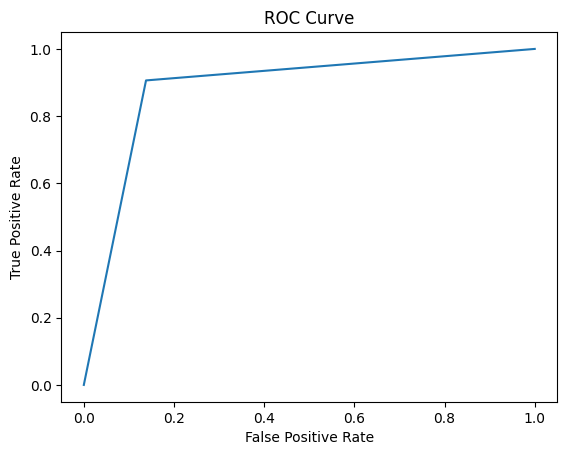

In [45]:
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

The ROC curve was plotted to visualize the tradeoff between true positive rate (TPR) and false positive rate (FPR) at different thresholds. A model with a higher ROC curve (closer to the top-left corner) is considered better. in this case the model is better. 

**Conclusion For the Heart Prediction Project**

*   The dataset is helpful in understanding how to handle binary classification problems with a combination of numerical and categorical variables, according to the analysis of the heart data project. With an accuracy of 88.52%, the Logistic Regression classifier was the most accurate, and the Random Forest classifier came in right behind it with an accuracy of 83.61%.
*   The insights offered by the evaluation can be used by  experts, like doctors or nurses, to make educated decisions and take necessary action. The project used feature scaling and feature selection, and it was found that the outcomes were unaffected by the order in which the processes were carried out.
* Since there was a lack of domain expertise on heart disorders, outlier identification was not conducted; it is crucial to comprehend the topic before removing outliers. Understanding and presenting the analysis's conclusions depend heavily on the display of data via graphs and charts.  
*   In conclusion, the heart data project provided valuable insights into binary classification problems with a focus on heart diseases. The results can be used by subject matter experts to improve patient outcomes and enhance the decision-making process.



